In [2]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("manishkc06/human-memory-and-cognition")

# print("Path to dataset files:", path)

100%|██████████| 4.11M/4.11M [00:00<00:00, 8.68MB/s]

Extracting files...
Path to dataset files: C:\Users\dcjc9\.cache\kagglehub\datasets\manishkc06\human-memory-and-cognition\versions\1


In [20]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

#load data
data = pd.read_csv('hippoCorpusV2.csv')
#drop unnecessary variables
data.drop(['AssignmentId', 'WorkerId', 'mostSurprising', 'recAgnPairId', 'recImgPairId', 'similarityReason', 'story', 'summary', 'mainEvent'], axis =1, inplace=True )

In [13]:
data['annotatorGender'].astype('category').cat.codes.value_counts()

6    3422
0    3363
1      31
2      23
4      10
3       3
5       2
dtype: int64

In [14]:
# controversial cleaning
data.loc[data['annotatorGender'] == 'transwoman'] = 'man'
data.loc[data['annotatorGender'] == 'transman'] = 'woman'
data.loc[data['annotatorGender'] == 'na'] = np.nan
data.loc[data['annotatorGender'] == 'nonBinary'] = np.nan
data.loc[data['annotatorGender'] == 'other'] = np.nan

In [17]:
data['annotatorGender'] = data['annotatorGender'].astype('category').cat.codes

In [19]:
data.head(1)

,WorkTimeInSeconds,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,logTimeSinceEvent,memType,openness,similarity,stressful,timeSinceEvent
0,1641,25.0,0,white,1.0,1.0,NaN,3.0,4.49981,imagined,0.0,3.0,1.0,90.0


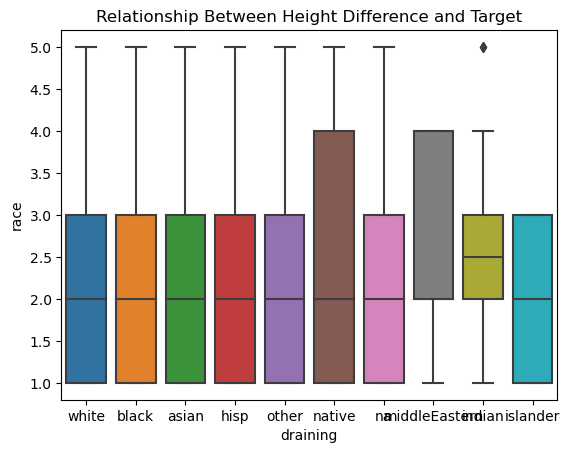

In [29]:
# Analyze the relationship between height difference and target
sns.boxplot(x=data['annotatorRace'], y=data['stressful'])
plt.title("Relationship Between Height Difference and Target")
plt.xlabel("draining")
plt.ylabel("race")
plt.show()